# Atractor de Lorenz

Consiste en el siguiente sistema de ecuaciones diferenciales acopladas:

$$
\frac{dx}{dt}=\sigma(y-x)\quad
\frac{dy}{dt}=x(\rho-z)-y\quad
\frac{dz}{dt}=xy-\beta z
$$

Donde $x$ es proporcional a la tasa de convección, $y$ a la variación de temperatura horizontal y $z$ a la variación de temperatura vertical. Las constantes $\sigma$, $\rho$ y $\beta$ son parametros del sistema.

Para este sistema no existen soluciones análiticas por lo que se optará por utilizar el método de *Runge-Kutta* de orden 4 para resolverlas.

In [37]:
#Definimos las constantes del sistema
sigma, beta, rho = 10.0, 8.0/3.0, 28.0

#Seguido de proporcionar las condiciones iniciales 
#de cada cantidad
x0, y0, z0 = 10.0, 0.1, 6.0

#Asignamos el tiempo final para realizar los cálculos así como
#el delta de tiempo a utilizar
tf, dt = 100.0, 1e-4

In [38]:
#Calculamos el número de valores que se irán a calcular para dar
#con el arreglo de tiempo a utilizar
n_datos = int(1.0 + tf/dt)
import numpy as np
t = np.linspace(0.0, tf, n_datos).astype(np.float64)

In [39]:
#Creamos las funciones correspondiente al método de RG4
def dXdt(x,y,sig=sigma):
    return sig*(y-x)

def dYdt(x,y,z,rho=rho):
    return (rho-z)*x-y

def dZdt(x,y,z,b=beta):
    return x*y-b*z

def RungeKutta4Py(x,y,z,dt):
    for i in range(1,t.size):
        k1 = dt*dXdt( x[i-1], y[i-1] )
        m1 = dt*dYdt( x[i-1], y[i-1], z[i-1] )
        l1 = dt*dZdt( x[i-1], y[i-1], z[i-1] )

        k2 = dt*dXdt( x[i-1]+ k1/2.0, y[i-1]+ m1/2.0 )
        m2 = dt*dYdt( x[i-1]+ k1/2.0, y[i-1]+ m1/2.0, z[i-1]+ l1/2.0 )
        l2 = dt*dZdt( x[i-1]+ k1/2.0, y[i-1]+ m1/2.0, z[i-1]+ l1/2.0 )

        k3 = dt*dXdt( x[i-1]+ k2/2.0, y[i-1]+ m2/2.0 )
        m3 = dt*dYdt( x[i-1]+ k2/2.0, y[i-1]+ m2/2.0, z[i-1]+ l2/2.0 )
        l3 = dt*dZdt( x[i-1]+ k2/2.0, y[i-1]+ m2/2.0, z[i-1]+ l2/2.0 )

        k4 = dt*dXdt( x[i-1]+ k3, y[i-1]+ m3 )
        m4 = dt*dYdt( x[i-1]+ k3, y[i-1]+ m3, z[i-1]+ l3 )
        l4 = dt*dZdt( x[i-1]+ k3, y[i-1]+ m3, z[i-1]+ l3 )

        x[i] = x[i-1] + (k1+k2+k3+k4)/6.0
        y[i] = y[i-1] + (m1+m2+m3+m4)/6.0
        z[i] = z[i-1] + (l1+l2+l3+l4)/6.0

In [40]:
%load_ext Cython

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


In [41]:
%%cython

cimport cython
import numpy as np
cimport numpy as np

cdef np.float64_t dXdtCy(np.float64_t x,np.float64_t y,np.float64_t sig):
    return sig*(y-x)

cdef np.float64_t dYdtCy(np.float64_t x,np.float64_t y,np.float64_t z,np.float64_t rho):
    return (rho-z)*x-y

cdef np.float64_t dZdtCy(np.float64_t x,np.float64_t y,np.float64_t z,np.float64_t b):
    return x*y-b*z

@cython.boundscheck(False)
@cython.wraparound(False)
def RungeKutta4Cy(np.float64_t[:] x,np.float64_t[:] y,np.float64_t[:] z,float dt, float sigma, float rho, float b):
    cdef int N = x.shape[0]
    cdef Py_ssize_t i
    cdef np.float64_t k1,m1,l1, k2,m2,l2, k3,m3,l3 
    
    for i in range(1,N):
        k1 = dt*dXdtCy( x[i-1], y[i-1], sigma )
        m1 = dt*dYdtCy( x[i-1], y[i-1], z[i-1], rho )
        l1 = dt*dZdtCy( x[i-1], y[i-1], z[i-1], b )

        k2 = dt*dXdtCy( x[i-1]+ k1/2.0, y[i-1]+ m1/2.0, sigma )
        m2 = dt*dYdtCy( x[i-1]+ k1/2.0, y[i-1]+ m1/2.0, z[i-1]+ l1/2.0, rho )
        l2 = dt*dZdtCy( x[i-1]+ k1/2.0, y[i-1]+ m1/2.0, z[i-1]+ l1/2.0, b )

        k3 = dt*dXdtCy( x[i-1]+ k2/2.0, y[i-1]+ m2/2.0, sigma )
        m3 = dt*dYdtCy( x[i-1]+ k2/2.0, y[i-1]+ m2/2.0, z[i-1]+ l2/2.0, rho )
        l3 = dt*dZdtCy( x[i-1]+ k2/2.0, y[i-1]+ m2/2.0, z[i-1]+ l2/2.0, b )

        k4 = dt*dXdtCy( x[i-1]+ k3, y[i-1]+ m3, sigma )
        m4 = dt*dYdtCy( x[i-1]+ k3, y[i-1]+ m3, z[i-1]+ l3, rho )
        l4 = dt*dZdtCy( x[i-1]+ k3, y[i-1]+ m3, z[i-1]+ l3, b )

        x[i] = x[i-1] + (k1+k2+k3+k4)/6.0
        y[i] = y[i-1] + (m1+m2+m3+m4)/6.0
        z[i] = z[i-1] + (l1+l2+l3+l4)/6.0

In [42]:
#Creamos y fijamos la memoria requerida para almacenar tanto la
#posicion inicial como los cálculos posteriores
from numpy import zeros_like

xPy,yPy,zPy = zeros_like(t),  zeros_like(t),  zeros_like(t)
xCy,yCy,zCy = zeros_like(t),  zeros_like(t),  zeros_like(t)
xPy[0], yPy[0], zPy[0] = x0,y0,z0
xCy[0], yCy[0], zCy[0] = x0,y0,z0

%timeit RungeKutta4Py(xPy, yPy, zPy, dt)
%timeit RungeKutta4Cy(xCy, yCy, zCy , dt, sigma, rho, beta)

24.3 s ± 341 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
249 ms ± 1.25 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


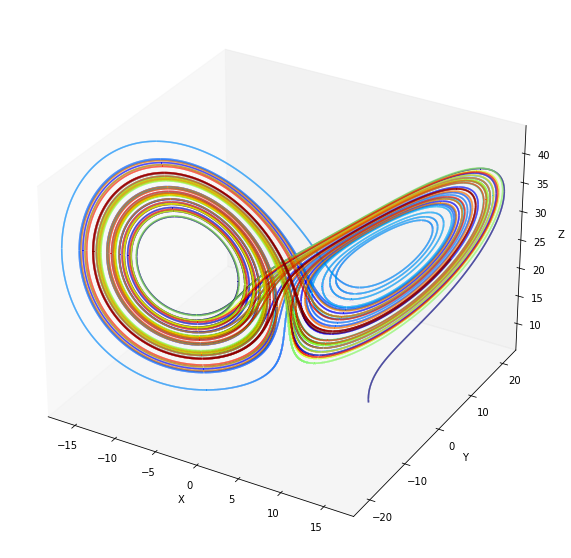

In [43]:
%matplotlib inline

from mpl_toolkits.mplot3d.art3d import Line3DCollection
from matplotlib.pyplot import figure, Normalize, show

figura3D = figure(1, figsize=(10,10))
sub3D = figura3D.add_subplot(111, projection="3d")
sub3D.set_xlim(xCy.min(), xCy.max())
sub3D.set_ylim(yCy.min(), yCy.max())
sub3D.set_zlim(zCy.min(), zCy.max())
sub3D.set_xlabel("X")
sub3D.set_ylabel("Y")
sub3D.set_zlabel("Z")

normalizacion = Normalize(0, n_datos-1)
ColeccionLineas = Line3DCollection([], cmap="jet", norm=normalizacion)

from numpy import arange, array, hstack
ColeccionLineas.set_array(arange(n_datos))

puntos = array([xCy[:], yCy[:], zCy[:]]).T.reshape(-1,1,3)
segmentos = hstack([puntos[:-1], puntos[1:]])
ColeccionLineas.set_segments(segmentos)
sub3D.add_collection(ColeccionLineas)
sub3D.grid(False)


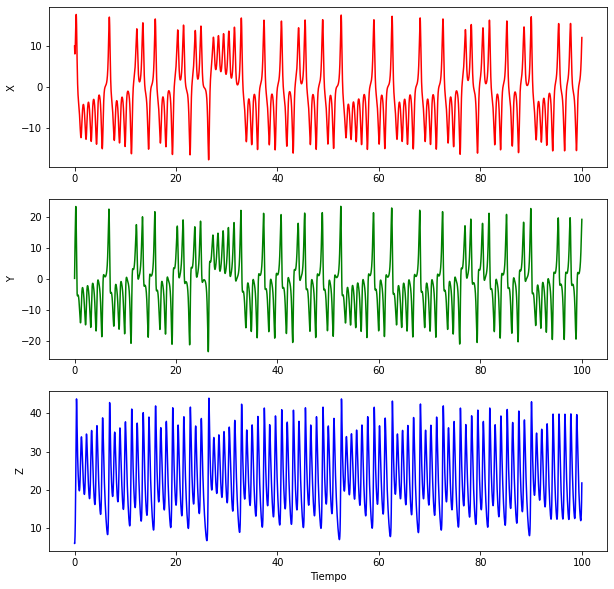

In [44]:
figuras2D = figure(2, figsize=(10,10))
subX, subY, subZ = figuras2D.add_subplot(311),  figuras2D.add_subplot(312),  figuras2D.add_subplot(313)

subX.set_ylabel("X")
subY.set_ylabel("Y")
subZ.set_xlabel("Tiempo")
subZ.set_ylabel("Z")

subX.plot(t,xCy,"-r")
subY.plot(t,yCy,"-g")
subZ.plot(t,zCy,"-b")


show()